# Praca domowa 2
### Dominik Stańczak

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
%matplotlib inline
from labellines import labelLines

def simulate(n, xi = np.linspace(0, 100, 100000), r0=(1, 0)):
    r0 = np.array(r0).astype(xi.dtype)
    def f(r, xi, n):
        theta, y = r
        if xi == 0:
            return (y, -1/3)
        else:
            return (y, -2/xi*y-theta**n)


    theta, y = odeint(f, r0, xi, args=(n,)).T

    # radzenie sobie z błędami numerycznymi
    df = pd.DataFrame({"xi":xi, "theta":theta, "y": y})
    df = df.dropna()
    
    reasonable_solution = df.y > -1e10   # rozwiązanie rozbiega się do minus nieskończoności
    if (~reasonable_solution).any():
        print(f"Rozwiązanie dla i={i} rozbiega się!")
        df.iloc[reasonable_solution.idxmin():] = np.nan
    df = df.dropna()
    
    return df

def plot(df, n, *args, **kwargs):
    df.plot('xi', 'theta', label=f"$n={n}$", *args, **kwargs)
    
xi = np.arange(0, 40, 1e-5)
wyniki = {}
plt.style.use('grayscale')

/usr/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Rozwiązanie dla i=2.0 rozbiega się!


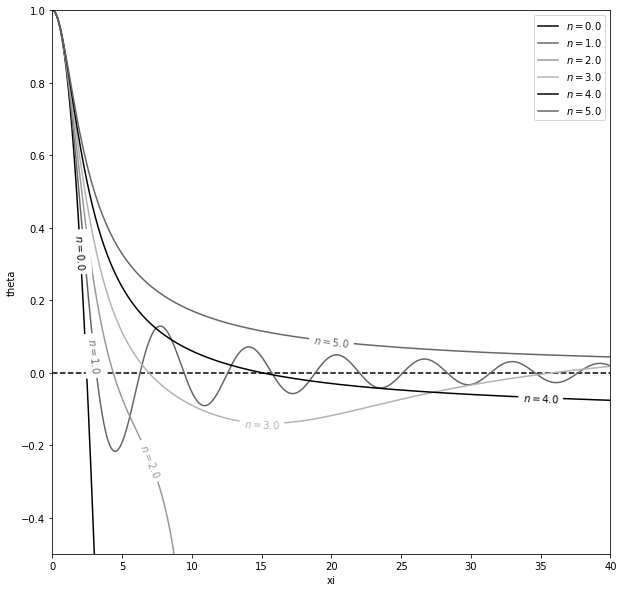

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("theta")
ax.axhline(linestyle="--")
ax.set_xlim(xi.min(), xi.max())

for i in np.arange(0, 5.01, 1):
    solution = simulate(i, xi)
    style="-"
    interpolator = InterpolatedUnivariateSpline(solution.xi, solution.theta)
    try: 
        xi1 = interpolator.roots()[0]
        wyniki[i] = pd.Series({'xi':xi1,
                               'theta':interpolator(xi1),
                               'y': interpolator.derivative(1)(xi1)})
    except IndexError: # nie istnieje miejsce zerowe
        wyniki[i] = pd.Series({'xi':np.nan,
                               'theta':np.nan,
                               'y': np.nan})
    plot(solution, i, ylim=(-0.5, 1), ax=ax, style=style)
labelLines(ax.get_lines(), xvals=[2, 3, 7, 15, 35, 20])

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


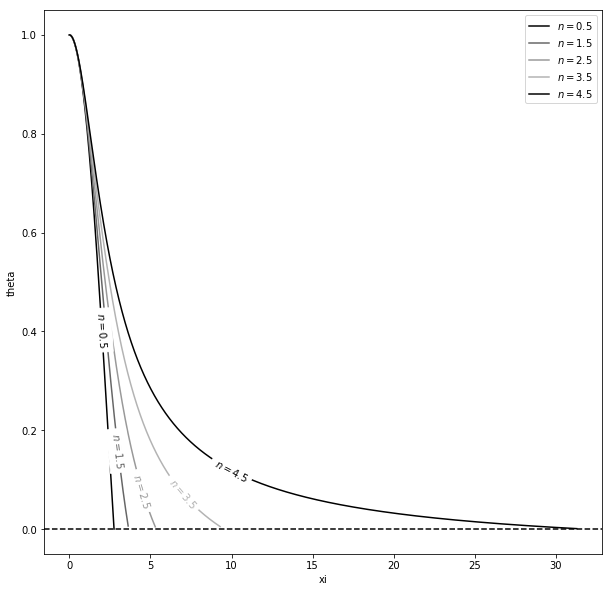

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("theta")
ax.axhline(linestyle="--")

for i in np.arange(0.5, 5, 1):
    solution = simulate(i, xi)
    argmax = solution.xi.idxmax()
    wyniki[i] = solution.iloc[argmax]
    plot(solution, i, ax=ax)
labelLines(ax.get_lines(), xvals=[2, 3, 4.5, 7, 10])

In [4]:
wyniki_df = pd.DataFrame(wyniki).T.sort_index(0)
wyniki_df['rho_c/rho_avg'] = -wyniki_df['xi'] / (3 * wyniki_df['y'])
wyniki_df['wn'] = (4*np.pi * (wyniki_df.index +1) * wyniki_df['y']**2)**-1
wyniki_df

,xi,theta,y,rho_c/rho_avg,wn
0.0,2.44949,8.713173818520811e-17,-0.8164965809341087,1,0.119366
0.5,2.75248,0.000109264,-0.500074,1.83471,0.212143
1.0,3.14159,1.7614314835949193e-17,-0.31830987469965577,3.28987,0.392699
1.5,3.62311,0.0062825,-0.206749,5.8414,0.74467
2.0,4.35287,1.9743570376889292e-17,-0.12724868838566478,11.4025,1.63818
2.5,5.29631,0.00454713,-0.0779725,22.6418,3.73972
3.0,6.89685,9.957428160345936e-18,-0.04242975496469318,54.1825,11.0507
3.5,9.29699,0.00509274,-0.0218728,141.682,36.963
4.0,14.9715,-6.048553088502102e-18,-0.008018086377549595,622.407,247.559
4.5,31.3001,0.000935408,-0.00177382,5881.85,4598.4
